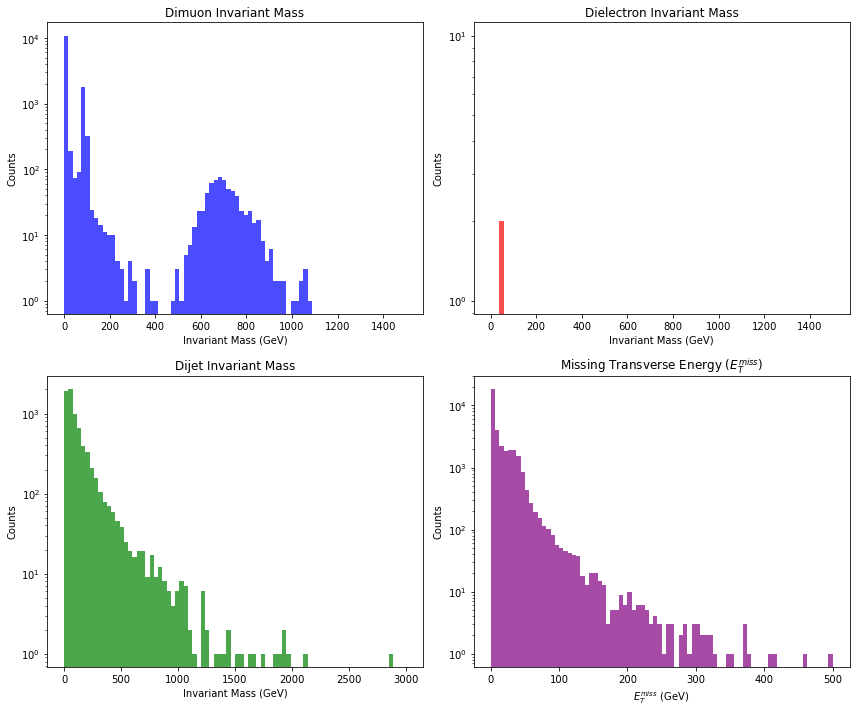

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

file = ROOT.TFile("muons_v2.root")
tree = file.Get("t3333")

invariant_masses_mumu = []
invariant_masses_ee = []
invariant_masses_jets = []
missing_energy = []

for i in range(tree.GetEntries()):
    tree.GetEntry(i)

    #Dimuon Invariant Mass
    if tree.NMUO == 2:
        px = np.array(tree.PXMUO) / 1000
        py = np.array(tree.PYMUO) / 1000
        pz = np.array(tree.PZMUO) / 1000
        E = np.array(tree.EEMUO) / 1000
        charge = np.array(tree.KFMUO)

        if len(px) == 2 and charge[0] * charge[1] < 0:
            m_mumu = np.sqrt((E[0] + E[1])**2 - ((px[0] + px[1])**2 + (py[0] + py[1])**2 + (pz[0] + pz[1])**2))
            invariant_masses_mumu.append(m_mumu)

    #Dielectron Invariant Mass
    if tree.NELE == 2:
        px = np.array(tree.PXELE) / 1000
        py = np.array(tree.PYELE) / 1000
        pz = np.array(tree.PZELE) / 1000
        E = np.array(tree.EEELE) / 1000
        charge = np.array(tree.KFELE)

        if len(px) == 2 and charge[0] * charge[1] < 0:
            m_ee = np.sqrt((E[0] + E[1])**2 - ((px[0] + px[1])**2 + (py[0] + py[1])**2 + (pz[0] + pz[1])**2))
            invariant_masses_ee.append(m_ee)

    #Dijet Invariant Mass
    if tree.NJET >= 2:
        px = np.array(tree.PXJET) / 1000
        py = np.array(tree.PYJET) / 1000
        pz = np.array(tree.PZJET) / 1000
        E = np.array(tree.EEJET) / 1000

        m_jj = np.sqrt((E[0] + E[1])**2 - ((px[0] + px[1])**2 + (py[0] + py[1])**2 + (pz[0] + pz[1])**2))
        invariant_masses_jets.append(m_jj)

    missing_energy.append(np.sqrt(tree.PXMISS**2 + tree.PYMISS**2) / 1000)

invariant_masses_mumu = np.array(invariant_masses_mumu)
invariant_masses_ee = np.array(invariant_masses_ee)
invariant_masses_jets = np.array(invariant_masses_jets)
missing_energy = np.array(missing_energy)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plots = [
    (invariant_masses_mumu, "Dimuon Invariant Mass", (0, 1500), "blue", True),
    (invariant_masses_ee, "Dielectron Invariant Mass", (0, 1500), "red", True),
    (invariant_masses_jets, "Dijet Invariant Mass", (0, 3000), "green", True),
    (missing_energy, "Missing Transverse Energy ($E_T^{miss}$)", (0, 500), "purple", True)]

for ax, (data, title, x_range, color, log_scale) in zip(axs.flat, plots):
    ax.hist(data, bins=80, range=x_range, alpha=0.7, color=color)
    ax.set_title(title)
    ax.set_xlabel("Invariant Mass (GeV)" if "Mass" in title else "$E_T^{miss}$ (GeV)")
    ax.set_ylabel("Counts")
    if log_scale:
        ax.set_yscale("log")

plt.tight_layout()
plt.show()

# **Evidence for New Particle Production**

We analyzed the dataset to search for possible new physics signals by examining:

- The **dimuon invariant mass spectrum** $m_{\mu\mu}$,
- The **dielectron invariant mass spectrum** $m_{ee}$,
- The **dijet invariant mass spectrum** $m_{jj}$,
- The **missing transverse energy spectrum** $E_T^{\text{miss}}$.

## **1. Dimuon Invariant Mass Spectrum**
- A **strong peak at 3.1 GeV** (consistent with $J/\psi$ meson).
- A **secondary peak at 9.5 GeV** (consistent with $\Upsilon(1S)$ meson).
- A **large peak at 91 GeV**, matching the **$Z$ boson** ($Z \to \mu^+ \mu^-$).
- **Potential new physics?**
  - A **small excess around 500-900 GeV**, which is not expected from the Standard Model.  
    This could indicate a **heavy resonance**, such as a **$Z'$ boson**.

## **2. Dielectron Invariant Mass Spectrum**
- Sparse statistics, with only **a few electron events**.
- No significant new peaks detected due to low statistics.

## **3. Dijet Invariant Mass Spectrum**
- The distribution **falls off smoothly**, as expected from QCD background.
- No **clear bump or peak** indicating new physics.
- No evidence for a **new heavy gluon ($G^*$) or $Z'$ decaying to quarks**.

## **4. Missing Transverse Energy Spectrum**
- The spectrum follows a standard distribution.
- **No significant excess at high $E_T^{\text{miss}}$** (e.g., above 300 GeV).
- No evidence for **dark matter or supersymmetric particles**.

## **Conclusion**
- There is **a potential excess in the dimuon spectrum** around 500-900 GeV, which could hint at a  **new neutral boson ($Z'$ or dark photon)**.
- However, **the other searches do not show strong signs of new particles**.
- Further study, including event selection and background estimation, is needed to confirm if this excess is statistically significant.